In [1]:
from google.colab import files
upload = files.upload()

Saving Iris.csv to Iris.csv


**Change the feature name "Species" to "Target"** &

**Encode the Target feature to Numerical feature**



In [87]:
import pandas as pd
import numpy as np

df = pd.read_csv("Iris.csv")
df.head()
column_names = list(df.columns)
#print(column_names)
df = df.rename(columns= {"Species": "Target"})
print(df.head())
#df.Target.unique()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm       Target
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Target_encoded = le.fit_transform(df['Target'])
df['Target'] = Target_encoded
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


**Train & Test Split**

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop(["Id", "Target"], axis=1)
#X.head()
y = df["Target"]
#y.head()
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .75, test_size = 0.25, random_state = 1)
#print(df.shape)
#len(X_train)+len(X_test)

**Create KNN Classifier**

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier (n_neighbors=13)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9736842105263158

In [69]:
knn.predict([[4.8, 3.0, 1.5, 0.3]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

**Confusion Matrix - Determine and Plot**

In [79]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


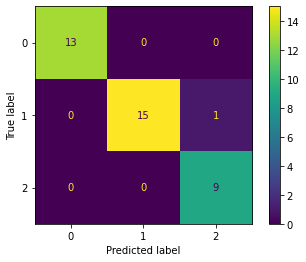

In [80]:
import matplotlib.pyplot as plt

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

**Print Classification Report - Precision, Recall and F1 score**

In [88]:
from sklearn.metrics import classification_report

 #print(classification_report(y_test, y_pred, target_names=target_names))
print(classification_report(y_test, y_pred, target_names = df.Target.unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



**CROSS VALIDATION**

1. Split the data into X equal paritions / folds

2. use fold 1 as the test set and the (X-1) folds as train set

3.  Calculate test accuracy

4.  Repeat these steps 2, 3 for X times

5. Use the average of all these X testing accuracies as the estimate of sample accuracy

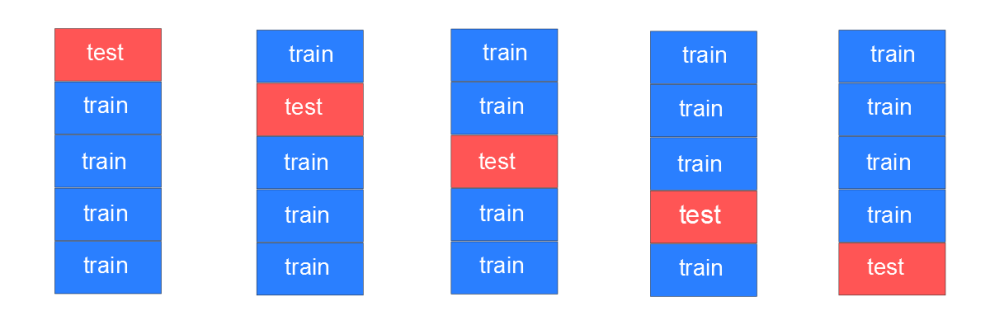

sample-Ruff

In [90]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier (n_neighbors=5)
scores = cross_val_score(knn, X, y , cv = 10, scoring= 'accuracy')
print(scores.mean())

0.9666666666666668


**Note: update the range cv**

In [111]:
from sklearn.model_selection import cross_val_score
k_range = range(1,40)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier (n_neighbors = k)
  scores = cross_val_score(knn, X, y , cv = 10, scoring= 'accuracy')
  k_scores.append(scores.mean())

k_opt = k_range[np.argmax(k_scores)]
k_opt

13

**Plot mean score Vs k**

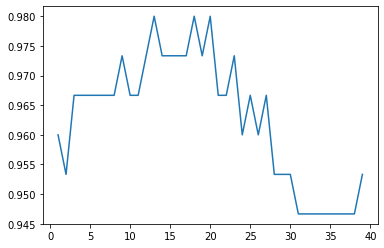

In [110]:
import seaborn as sn

sn.lineplot(x=k_range, y=k_scores)

**Grid search**

In [127]:
from sklearn.model_selection import GridSearchCV

k_range=list(range(1,40))
grid_params = dict(n_neighbors = k_range)
grid = GridSearchCV(knn, grid_params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

grid_search = grid.fit(X, y)

Fitting 10 folds for each of 39 candidates, totalling 390 fits


**Print Best parameters outof Gridsearch**

In [128]:
print(grid_search.best_params_)

{'n_neighbors': 13}
